<a href="https://colab.research.google.com/github/esragcetnky/Intro-to-Recurrent-Neural-Networks-LSTM/blob/main/Intro_to_Recurrent_Neural_Networks_LSTM_%7C_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Import Libraries & Deciding plot style

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as k
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.models import Sequential
from keras.optimizers import SGD

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-darkgrid')

# 1.Mount Drive & Import Dataset

*Mount Drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls

drive  sample_data


In [ ]:
cd drive/MyDrive/Tasarım\ Süreçleri/Colab\ Notebooks

/content/drive/MyDrive/Tasarım Süreçleri/Colab Notebooks


In [ ]:
pwd

'/content/drive/MyDrive/Tasarım Süreçleri/Colab Notebooks'

In [ ]:
!ls

 dataset
'Edureka | LSTM Explained.ipynb'
 images
'Intro to Recurrent Neural Networks LSTM | GRU.ipynb'


In [ ]:
cd dataset

/content/drive/My Drive/Tasarım Süreçleri/Colab Notebooks/dataset


*Import Dataset*

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 48.8MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  stock-time-series-20050101-to-20171231.zip
  inflating: AABA_2006-01-01_to_2018-01-01.csv  
  inflating: AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: CVX_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: IBM_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: KO_2006-01-01_to_2018-01-01.csv  
  inflating: MCD_2006-01-01_to_2018-01-01.csv  
  inflating: MMM_2006-01-01_to_20

In [ ]:
!ls

AABA_2006-01-01_to_2018-01-01.csv	 JPM_2006-01-01_to_2018-01-01.csv
AAPL_2006-01-01_to_2018-01-01.csv	 KO_2006-01-01_to_2018-01-01.csv
all_stocks_2006-01-01_to_2018-01-01.csv  MCD_2006-01-01_to_2018-01-01.csv
all_stocks_2017-01-01_to_2018-01-01.csv  MMM_2006-01-01_to_2018-01-01.csv
AMZN_2006-01-01_to_2018-01-01.csv	 MRK_2006-01-01_to_2018-01-01.csv
AXP_2006-01-01_to_2018-01-01.csv	 MSFT_2006-01-01_to_2018-01-01.csv
BA_2006-01-01_to_2018-01-01.csv		 NationalNames.csv
CAT_2006-01-01_to_2018-01-01.csv	 NationalReadMe.pdf
CSCO_2006-01-01_to_2018-01-01.csv	 NKE_2006-01-01_to_2018-01-01.csv
CVX_2006-01-01_to_2018-01-01.csv	 PFE_2006-01-01_to_2018-01-01.csv
database.sqlite				 PG_2006-01-01_to_2018-01-01.csv
DIS_2006-01-01_to_2018-01-01.csv	 StateNames.csv
GE_2006-01-01_to_2018-01-01.csv		 StateReadMe.pdf
GOOGL_2006-01-01_to_2018-01-01.csv	 TRV_2006-01-01_to_2018-01-01.csv
GS_2006-01-01_to_2018-01-01.csv		 UNH_2006-01-01_to_2018-01-01.csv
hashes.txt				 UTX_2006-01-01_to_2018-01-01.csv
HD_200

In [ ]:
dataset=pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv',
                    index_col='Date',
                    parse_dates=['Date'])

In [ ]:
dataframe=pd.DataFrame(dataset)

# 2.Analyze Data

In [ ]:
dataframe.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
dataframe.shape

(3020, 6)

* so we have 3020 sample with 7 columns , lets see the columns name

In [ ]:
dataframe.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

* lets find out types of columns and see if there are null values

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [ ]:
dataframe.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


# 3.Visualize Data

## 3.1 Scatter Plot

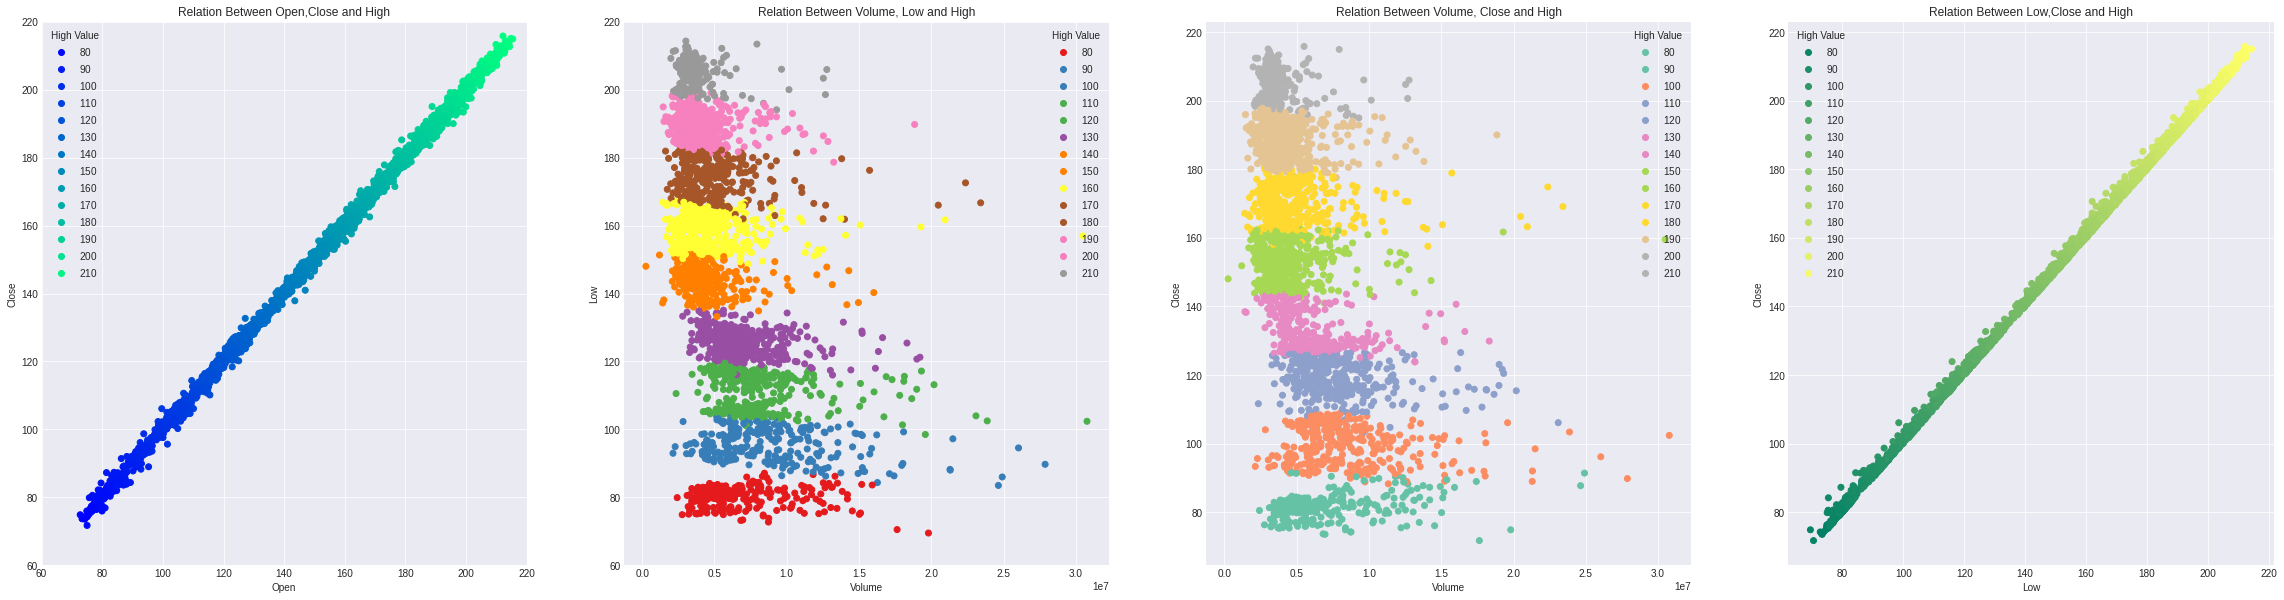

In [ ]:
# created figure with 3 ax in it
fig, ((ax0,ax1,ax2,ax3))=plt.subplots(figsize=(40,10),
                            ncols=4,
                            nrows=1)

# ax0 is a scatter plot
plot0=ax0.scatter(dataframe['Open'],
                  dataframe['Close'],
                  c=dataframe['High'],
                  cmap='winter')
ax0.legend(*plot0.legend_elements(),
            title="High Value")
ax0.set(title="Relation Between Open,Close and High",
        xlabel='Open',
        ylabel='Close')

ax0.set_xlim([60,220])
ax0.set_ylim([60,220])

#ax1 is a scatter plot 
plot1=ax1.scatter(dataframe['Volume'],
                  dataframe['Low'],
                  c=dataframe['High'],
                  cmap='Set1')
ax1.legend(*plot1.legend_elements(),
            title="High Value")
ax1.set(title="Relation Between Volume, Low and High",
        xlabel='Volume',
        ylabel='Low')
ax1.set_ylim([60,220])


#ax2 is a scatter plot
plot2=ax2.scatter(dataframe['Volume'],
                  dataframe['Close'],
                  c=dataframe['High'],
                  cmap='Set2')
ax2.legend(*plot2.legend_elements(),
            title="High Value")
ax2.set(title="Relation Between Volume, Close and High",
        xlabel='Volume',
        ylabel='Close')

#ax3 is a scatter plot
plot3=ax3.scatter(dataframe['Low'],
                  dataframe['Close'],
                  c=dataframe['High'],
                  cmap='summer')
ax3.legend(*plot3.legend_elements(),
            title="High Value")
ax3.set(title="Relation Between Low,Close and High",
        xlabel='Low',
        ylabel='Close')


fig.show()

## 3.2 Histogram

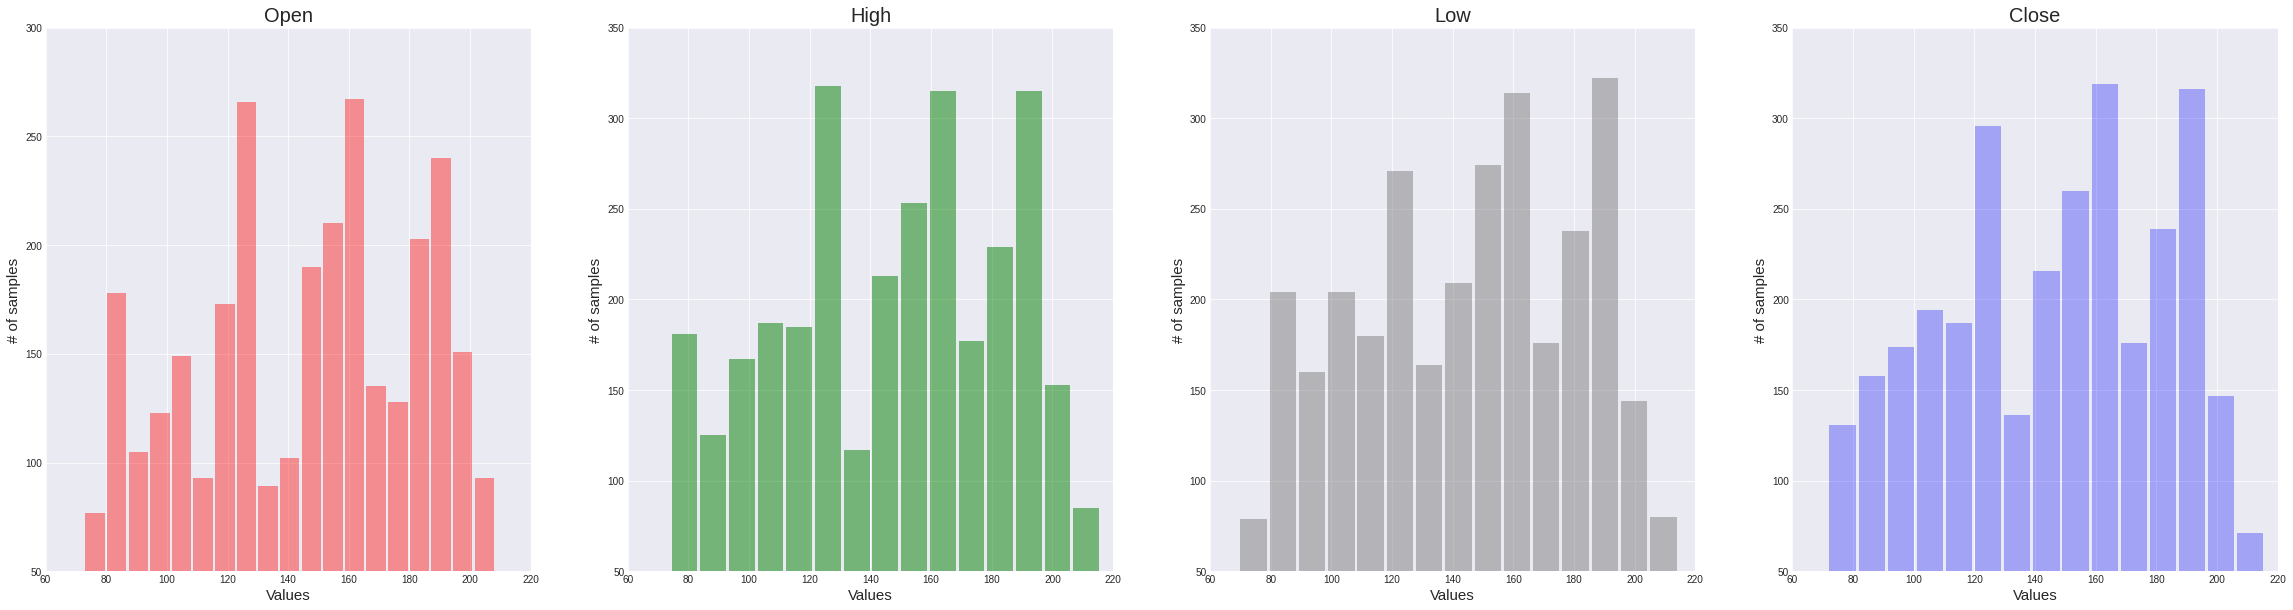

In [ ]:
fig, ((ax0,ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=4,figsize=(40,10))

ax0.hist(dataframe['Open'],color='red',bins=20,alpha=0.4, rwidth=0.90)
ax0.set_title(label='Open',fontsize=20)
ax0.set_xlabel("Values",fontsize=15)
ax0.set_ylabel("# of samples",fontsize=15)
ax0.set_ylim([50,300])
ax0.set_xlim([60,220])

ax1.hist(dataset['High'],color='green',bins=15,alpha=0.5, rwidth=0.90)
ax1.set_title(label='High',fontsize=20)
ax1.set_xlabel("Values",fontsize=15)
ax1.set_ylabel("# of samples",fontsize=15)
ax1.set_ylim([50,350])
ax1.set_xlim([60,220])

ax2.hist(dataset['Low'],color='grey',bins=15,alpha=0.5, rwidth=0.90)
ax2.set_title(label='Low',fontsize=20)
ax2.set_xlabel("Values",fontsize=15)
ax2.set_ylabel("# of samples",fontsize=15)
ax2.set_ylim([50,350])
ax2.set_xlim([60,220])

ax3.hist(dataset['Close'],color='blue',bins=15,alpha=0.3,rwidth=0.9)
ax3.set_xlabel("Values",fontsize=15)
ax3.set_ylabel("# of samples",fontsize=15)
ax3.set_title(label='Close',fontsize=20)
ax3.set_xlim([60,220])
ax3.set_ylim([50,350])

fig.show()

## 3.3 Line Plot

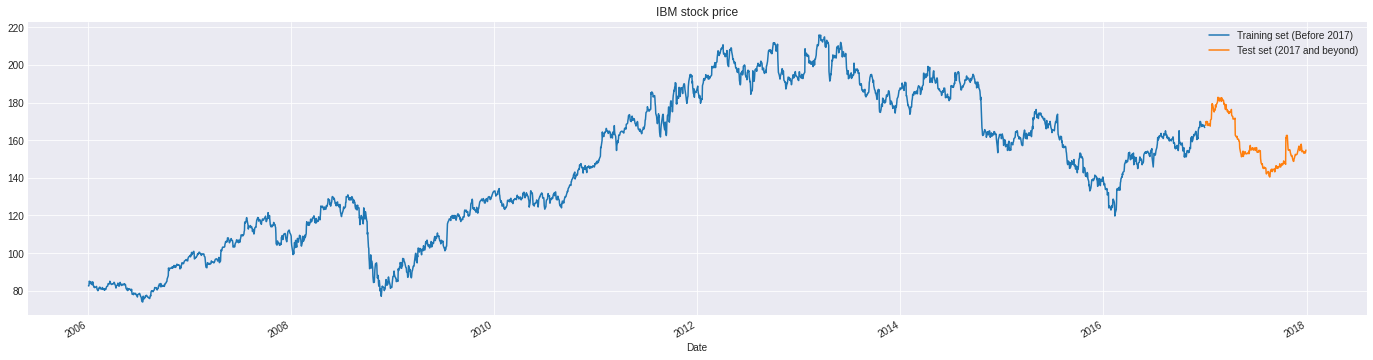

In [ ]:
dataset["High"][:'2016'].plot(figsize=(24,6),legend=True)
dataset["High"]['2017':].plot(figsize=(24,6),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

# 4.Scalling Data

* If the distribution of the quantity is normal, then it should be standardized, otherwise the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

* If the quantity values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1) then perhaps you can get away with no scaling of the data.

* Problems can be complex and it may not be clear how to best scale input data.
* Source: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

* If needed, the transform can be inverted. This is useful for converting predictions back into their original scale for reporting or plotting. This can be done by calling the inverse_transform() function.
* Source: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/